## You work for the data team at a local research hospital. You've been tasked with developing a means to help doctors diagnose breast cancer. You've been given data about biopsied breast cells; where it is benign (not harmful) or malignant (cancerous).

### What features of a cell are the largest drivers of malignancy? 
#### 1) Uniformity of Cell Size
#### 2) Bare Nuclei
#### 3) Single Cell size
#### 4) Uniformity of Cell Shape

### What features drive your false positive rate for your model you derived above, what features drive your false negative rate?
#### Features that drive the false positive rate are those features that lead to identifying a cell as malignant when it is benign. As cell size and cell shape have a collinear relationship and are heavily weighted in the model, they may outway other less heavily weighted predictors. There is a risk of cell size and cell shape driving a false positive rate if they read as benign and all other predictors read as malignant. 
####  Features that drive the false negative rate are those features that lead to identifying a cell as benign when it is malignant. As mentioned above, collinear features could drive this rate. 

### How would a physician use your product?
#### A physician would use this product to remove bias from the process of identifying cells as malignant or benign. The model built for this product was designed to minimize the occurance of malignant cells being identified as benign and thus avoid incorrectly telling a patient they do not have cancer. After the initial biopsy screen the doctor must then take in account lifestyle as well as medical and family history to provide an informed final diagnosis. 

### There is a non-zero cost in time and money to collect each feature about a given cell. How would you go about determining the most cost-effective method of detecting malignancy?
#### To determine the most cost-effective method of detecting malignant cells, the model should be tested with only the most heavely weighted predictors for cell classification. If the number of malignant biopsy samples classified as benign (false negatives) does not increase, we can save money by only collecting a subset of features. Additionally, features that have a colinear relationship can be viewed as redundant and removed from furthure collections. As always domain knowledge should be exercised when determining final feature selection. 

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from datetime import datetime, timedelta
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

## Data cleaning
#### Biopsy samples with missing feature values were removed. 

In [166]:
BC = pd.read_csv('/Users/josephineferrandino/Desktop/data_challenges/20A/data_challenge_3/breast-cancer-wisconsin.csv',header=None, names=['id', 'thickiness', 'cell_size', 'cell_shape', 'adhesion',
                                      'single_cell_size', 'nuclei', 'chromatin', 'nucleoli',
                                      'mitosis', 'diag'],)

In [167]:
BC.head()

,id,thickiness,cell_size,cell_shape,adhesion,single_cell_size,nuclei,chromatin,nucleoli,mitosis,diag
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [168]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                  699 non-null int64
thickiness          699 non-null int64
cell_size           699 non-null int64
cell_shape          699 non-null int64
adhesion            699 non-null int64
single_cell_size    699 non-null int64
nuclei              699 non-null object
chromatin           699 non-null int64
nucleoli            699 non-null int64
mitosis             699 non-null int64
diag                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [169]:
BC.describe()

,id,thickiness,cell_size,cell_shape,adhesion,single_cell_size,chromatin,nucleoli,mitosis,diag
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [170]:
print(BC.dtypes)

id                   int64
thickiness           int64
cell_size            int64
cell_shape           int64
adhesion             int64
single_cell_size     int64
nuclei              object
chromatin            int64
nucleoli             int64
mitosis              int64
diag                 int64
dtype: object


In [171]:
BC.describe()

,id,thickiness,cell_size,cell_shape,adhesion,single_cell_size,chromatin,nucleoli,mitosis,diag
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


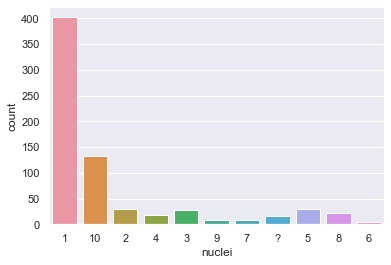

In [172]:
sns.set(style="darkgrid")
ax = sns.countplot(x = 'nuclei', data = BC)


In [173]:
BC.drop( BC[ BC['nuclei'] == '?' ].index , inplace=True)

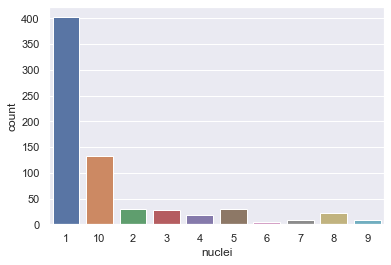

In [174]:
sns.set(style="darkgrid")
ax = sns.countplot(x = 'nuclei', data = BC)

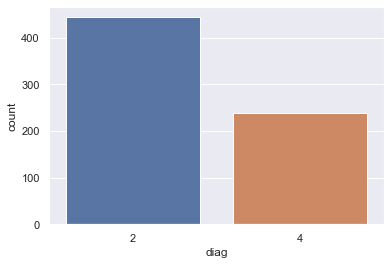

In [176]:
sns.set(style="darkgrid")
ax = sns.countplot(x = 'diag', data = BC)

In [177]:
BC['diag'].replace(2,0,inplace=True)

In [178]:
BC['diag'].replace(4,1,inplace=True)

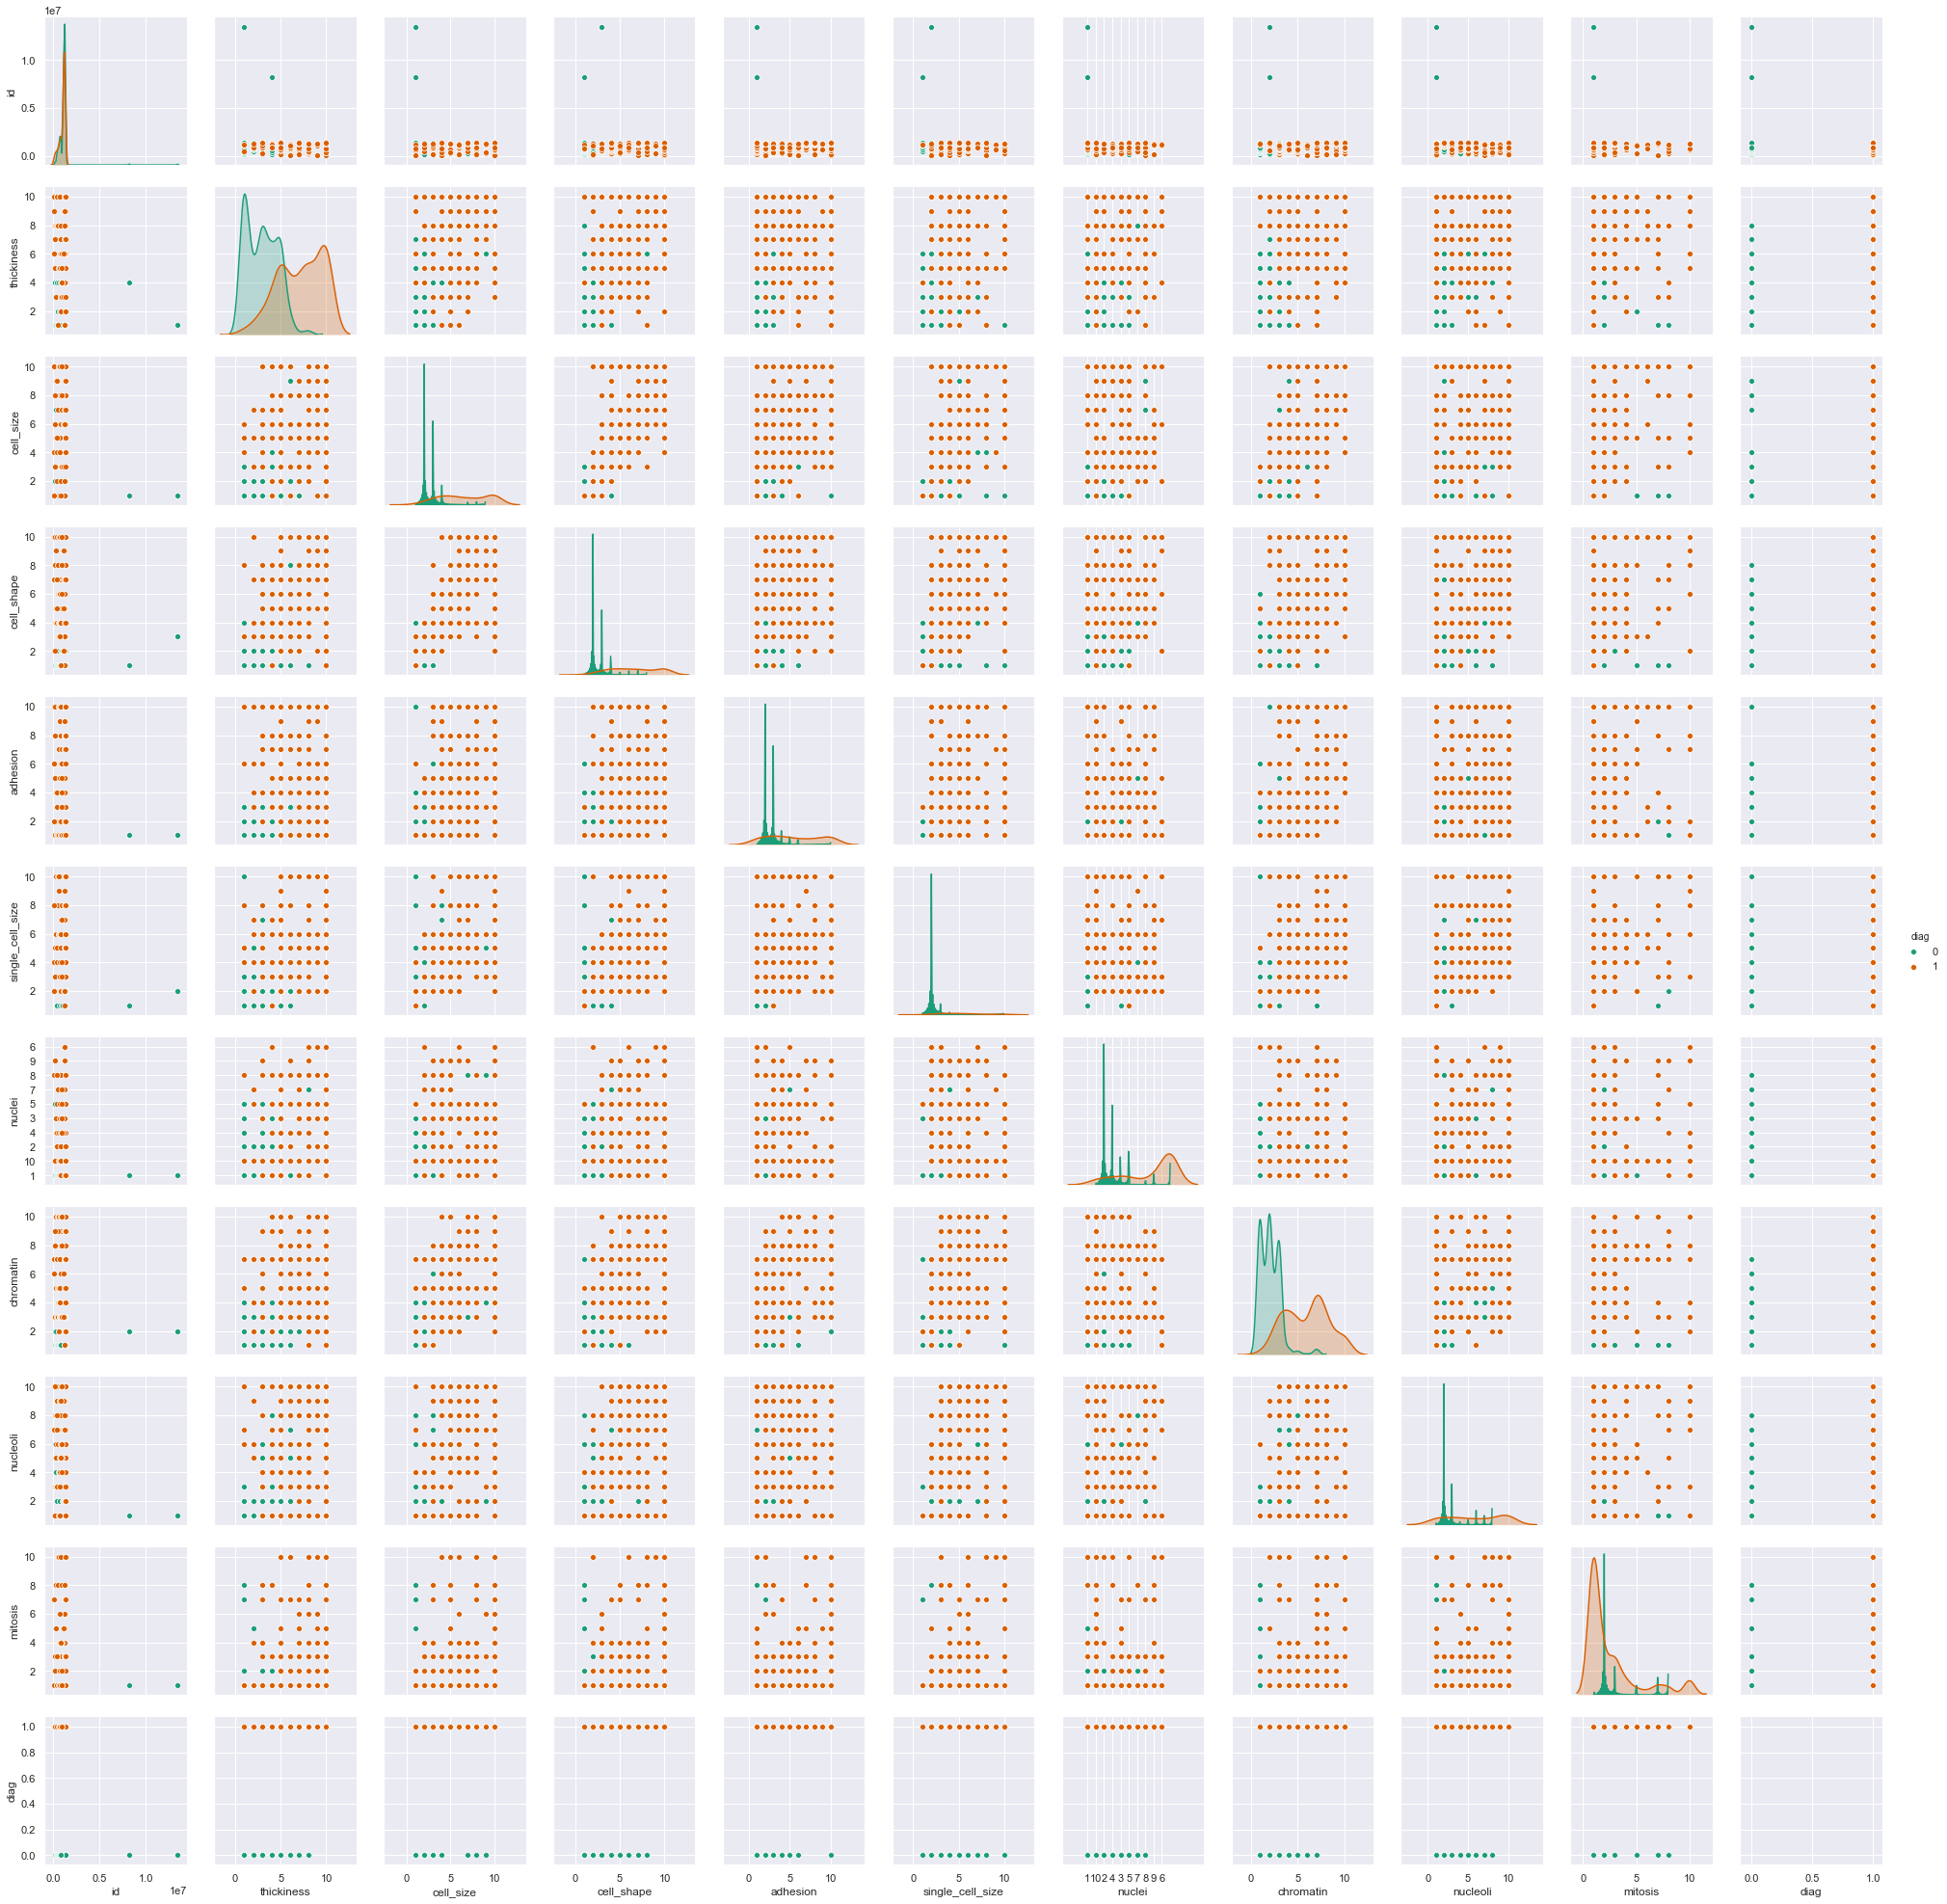

In [179]:
# Setosa is the most separable. 
sns.pairplot(BC,hue='diag',palette='Dark2')

In [37]:
from sklearn.model_selection import train_test_split

## Models Tested
### 1) Support vector machine
### 2) Random Forest
### The model witht he lowest value of malignant cells classified as benign was selected. Additionally, this value was reduced by oversampling from the malignant group to account for uneven sample sizes. 

In [190]:
X = BC[['thickiness','cell_size','cell_shape','adhesion','single_cell_size','nuclei','chromatin','nucleoli','mitosis']]
y = BC['diag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [192]:
from sklearn.svm import SVC

In [193]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [194]:
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[128   5]
 [  2  70]]


In [195]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       133
           1       0.93      0.97      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205



In [196]:
from imblearn.over_sampling import RandomOverSampler  
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30)
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [198]:
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[132   2]
 [  3 130]]


In [199]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       134
           1       0.98      0.98      0.98       133

    accuracy                           0.98       267
   macro avg       0.98      0.98      0.98       267
weighted avg       0.98      0.98      0.98       267



In [200]:
def bin_metrics(x, y):
    '''Prints four common metrics for evaluating classification predictions.'''
    print('Accuracy:', round(metrics.accuracy_score(x, y), 4))
    print('Precision:', round(metrics.precision_score(x, y), 4))
    print('Recall:', round(metrics.recall_score(x, y), 4))
    print('ROC_AUC:,', round(metrics.roc_auc_score(x, y), 4))
    print('F1:', round(metrics.f1_score(x, y), 4))

def plot_cm(x, y):
    cm = confusion_matrix(x, y)
    df_cm = pd.DataFrame(cm, columns=np.unique(x), index = np.unique(x))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt='g')# font size
    plt.ylim([0, 2])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.9888
Precision: 0.9924
Recall: 0.985
ROC_AUC:, 0.9887
F1: 0.9887


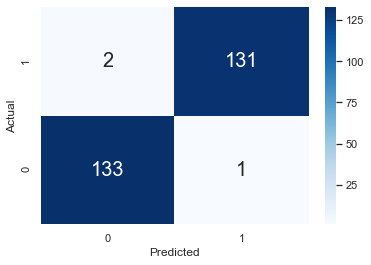

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
classifier = RandomForestClassifier(n_estimators=9, max_depth=100)
classifier.fit(X_train, y_train)
pred_train= classifier.predict(X_train)
pred_test= classifier.predict(X_test)
acc_val = metrics.accuracy_score(y_test, pred_test)
f1_val = f1_score(y_test, pred_test)
bin_metrics(y_test, pred_test)
plot_cm(y_test, pred_test)

In [207]:
feature_importances = pd.DataFrame(classifier.feature_importances_, index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head(9))

                  importance
cell_size           0.414879
nuclei              0.134279
single_cell_size    0.112532
cell_shape          0.102626
nucleoli            0.091344
adhesion            0.077571
thickiness          0.028676
chromatin           0.024242
mitosis             0.013852


Text(0.5, 0, 'Uniformity of Cell Shape')

Text(0, 0.5, 'Uniformity of Cell Size')

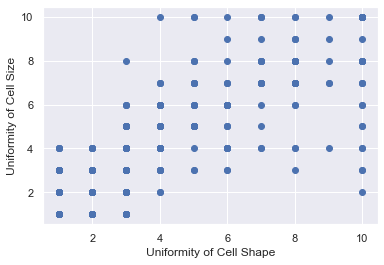

In [206]:
plt.scatter(BC['cell_size'], BC['cell_shape'])
plt.xlabel('Uniformity of Cell Shape')
plt.ylabel('Uniformity of Cell Size')
plt.show()

In [105]:
import pickle
s = pickle.dumps('Users/Desktop/data_challenges/classifier)

In [106]:
class2 = pickle.loads(s)

In [117]:
f = open('BC.pkl', 'wb')
pickle.dump(classifier, f)

In [131]:
pickle.dump(svc_model, open('/Users/josephineferrandino/Desktop/flask-rest-setup-master/sentiment-clf/BCC.pkl', 'wb'))

In [208]:
import pickle
pickle.dump(classifier, open('/Users/josephineferrandino/Desktop/flask-rest-setup-master/sentiment-clf/BCancerClassifier.pkl', 'wb'))

In [232]:
from joblib import dump
dump(classifier, '/Users/josephineferrandino/Desktop/flask-rest-setup-master/sentiment-clf/new.pkl')

['/Users/josephineferrandino/Desktop/flask-rest-setup-master/sentiment-clf/new.pkl']

In [246]:
# import requests

# url = 'http://127.0.0.1:5000/'
# input = [1, 1,1,1,1,1,1,1,1]
# input_data = pd.DataFrame(data = input).transpose()
# params ={'query': input_data}
# response = requests.get(url, params)
# response.json()

In [265]:
row = X.iloc[5]
classifier.predict(row.values.reshape(1,-1))


array([1])

In [251]:
url = 'http://127.0.0.1:5000/'
import requests
params ={'query': row.to_json()}
response = requests.get(url, params)
#r=response.json()
if 'json' in response.headers.get('Content-Type'):
    js = response.json()
else:
    print('Response content is not in JSON format.')
    js = 'spam'

In [252]:
js

{'message': 'Malignant', 'prediction': '1'}